# Data Visualization Using Arduino SensorKit

__This project takes 200 data inputs over time from an Arduino Uno (connected to a Sensor Base Kit) and provides Descriptive Statistics and Visualizations on the different types of environmental factors (Pressure, Altitude, Light, Sound, Temperature, and Humidity)__

This Notebook is Broken up into two parts: <br>
Part A - Data Collection <br>
Part B - Data Analysis and Visualization

In [1]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt

## Part A: Data Collection

In [2]:
# Lists of categories of data values
pressures = []
altitudes = []
lights = []
sounds = []
temps = []
hums = []
times = []

In [3]:
def collect_data():
    """Collects Data from Arduino and seperates it into previously defined lists"""
    # This is the port path that connects to the arduino (can be changed)
    port = '/dev/cu.usbmodem14101'

    # opening arduino data using Serial
    arduino = serial.Serial(port, 9600)
    print("Succesful Connection with Arduino")
    arduino_data = arduino.readline()
    
    #decoding data and finding individual data values
    try:
        decoded = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
        vals = decoded.split("x")
    except:
        print("Problem Occured in Decoding Data")
    
    #Creating a new list of values without the extra letters.
    new_vals = []
    for val in vals:
        new_val = val.strip()
        new_vals.append(new_val)

    # Creating the final list of data
    outlist = []
    for i in new_vals:
        outlist.append(float(i))
   
    # Adding the Data to the correct lists
    if len(outlist) == 6:
        pressures.append(outlist[0])
        altitudes.append(outlist[1])
        lights.append(outlist[2])
        sounds.append(outlist[3])
        temps.append(outlist[4])
        hums.append(outlist[5])

        #adding a timestamp value to a list of timestamps
        stamp = time.time()
        times.append(stamp)
    

In [4]:
def run(num, secs):
    """Runs the collect_data function a certain number with a pause time given by user
    
    Arguments:
    num -- number of times you want to collect a data value for each data category
    secs -- number of seconds that are paused between each data collection
    """
    print("Starting Data Collection: ")
    try:
        for i in range(num):
            collect_data()
            print(f"{i+1} / {num} complete")
            time.sleep(secs)   
    except:
        print("An unexpected error occured with data collection.")
        print(f"Collected {len(times)} data values for each category")
    
    print("Data Collection Complete")

# This will run the function 200 times with a .sleep() value of 2 seconds
run(200,2)

Starting Data Collection: 
Succesful Connection with Arduino
1 / 200 complete
Succesful Connection with Arduino
2 / 200 complete
Succesful Connection with Arduino
3 / 200 complete
Succesful Connection with Arduino
4 / 200 complete
Succesful Connection with Arduino
5 / 200 complete
Succesful Connection with Arduino
6 / 200 complete
Succesful Connection with Arduino
7 / 200 complete
Succesful Connection with Arduino
8 / 200 complete
Succesful Connection with Arduino
9 / 200 complete
Succesful Connection with Arduino
10 / 200 complete
Succesful Connection with Arduino
11 / 200 complete
Succesful Connection with Arduino
12 / 200 complete
Succesful Connection with Arduino
13 / 200 complete
Succesful Connection with Arduino
14 / 200 complete
Succesful Connection with Arduino
15 / 200 complete
Succesful Connection with Arduino
16 / 200 complete
Succesful Connection with Arduino
17 / 200 complete
Succesful Connection with Arduino
18 / 200 complete
Succesful Connection with Arduino
19 / 200 com

157 / 200 complete
Succesful Connection with Arduino
158 / 200 complete
Succesful Connection with Arduino
159 / 200 complete
Succesful Connection with Arduino
160 / 200 complete
Succesful Connection with Arduino
161 / 200 complete
Succesful Connection with Arduino
162 / 200 complete
Succesful Connection with Arduino
163 / 200 complete
Succesful Connection with Arduino
164 / 200 complete
Succesful Connection with Arduino
165 / 200 complete
Succesful Connection with Arduino
166 / 200 complete
Succesful Connection with Arduino
167 / 200 complete
Succesful Connection with Arduino
168 / 200 complete
Succesful Connection with Arduino
169 / 200 complete
Succesful Connection with Arduino
170 / 200 complete
Succesful Connection with Arduino
171 / 200 complete
Succesful Connection with Arduino
172 / 200 complete
Succesful Connection with Arduino
173 / 200 complete
Succesful Connection with Arduino
174 / 200 complete
Succesful Connection with Arduino
175 / 200 complete
Succesful Connection with A

## Part B: Data Analysis and Visualization

In [45]:
# Converting lists to numpy arrays in case it is necessary for future computation
pre_arr = np.array(pressures)
alt_arr = np.array(altitudes)
lig_arr = np.array(lights)
sou_arr = np.array(sounds)
tem_arr = np.array(temps)
hum_arr = np.array(hums)
tim_arr = np.array(times)

In [51]:
print(f"Mean Pressure: {np.mean(pressures)} Pa")
print(f"Standard Deviation of Pressure: {np.std(pressures)} Pa\n")
print(f"Mean Altitude: {np.mean(altitudes)} meters")
print(f"Standard Deviation of Altitude: {np.std(altitudes)} meters\n")
print(f"Mean Light Value: {np.mean(lights)}")
print(f"Standard Deviation of Light Value: {np.std(lights)}\n")
print(f"Mean Sound Values: {np.mean(sounds)}")
print(f"Standard Deviation of Sound Values: {np.std(sounds)}\n")
print(f"Mean Temperature: {np.mean(temps)} °C")
print(f"Standard Deviation of Temperature: {np.std(temps)} °C\n")
print(f"Mean Humidity: {np.mean(hums)}%")
print(f"Standard Deviation of Humidity: {np.std(hums)}%\n")

Mean Pressure: 99278.995 Pa
Standard Deviation of Pressure: 2.8887670380285084 Pa

Mean Altitude: 171.72815 meters
Standard Deviation of Altitude: 0.2444935121838615 meters

Mean Light Value: 36.695
Standard Deviation of Light Value: 10.757414884627254

Mean Sound Values: 129.71
Standard Deviation of Sound Values: 19.134677943461707

Mean Temperature: 24.248999999999995 °C
Standard Deviation of Temperature: 0.08425556361451768 °C

Mean Humidity: 40.705%
Standard Deviation of Humidity: 0.4774672763656165%



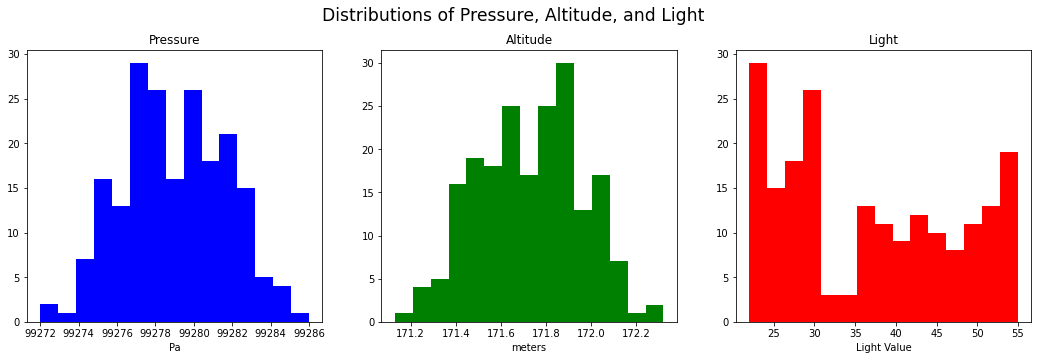

In [60]:
%matplotlib inline

#Distributions of Pressure, Altitude, and Light
fig = plt.figure(figsize = (18,5))
fig.suptitle('Distributions of Pressure, Altitude, and Light', y = 1, size = 'xx-large')

plt.subplot(131)
plt.title('Pressure')
plt.hist(pressures,bins = 15,  color ='blue')
plt.xlabel("Pa")

plt.subplot(132)
plt.title('Altitude')
plt.hist(altitudes,bins = 15, color = 'green')
plt.xlabel("meters")

plt.subplot(133)
plt.title('Light')
plt.hist(lights,bins = 15, color = 'red')
_=plt.xlabel("Light Value")

The pressure and altitude values are relatively normally distributed. Light, however, did not have a peak around the mean, rather is bimodal and has about 1/2 low values and 1/2 high values. This leads to the high standard deviation.

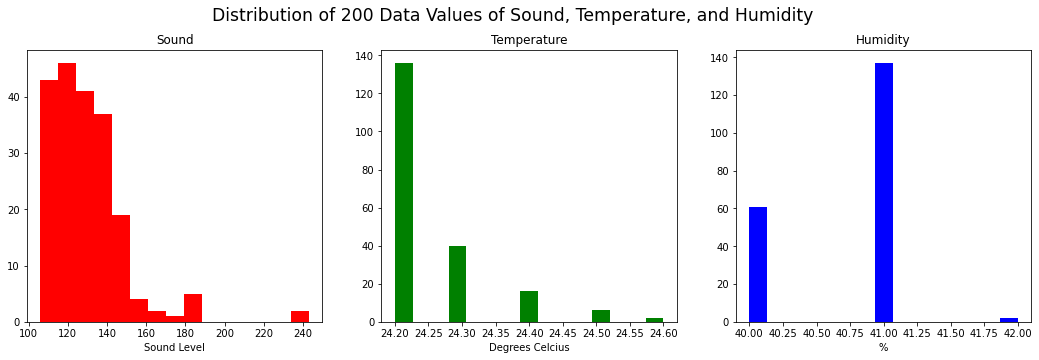

In [62]:
#Distributions of Sound, Temperature, and Humidity
fig = plt.figure(figsize = (18,5))
fig.suptitle('Distribution of 200 Data Values of Sound, Temperature, and Humidity', y = 1, size = 'xx-large')

plt.subplot(131)
plt.title('Sound')
plt.hist(sounds, bins = 15, color = 'red')
plt.xlabel("Sound Level")

plt.subplot(132)
plt.title('Temperature')
plt.hist(temps, bins = 15,  color = 'green')
plt.xlabel("Degrees Celcius")

plt.subplot(133)
plt.title('Humidity')
plt.hist(hums, bins = 15, color = 'blue')
_=plt.xlabel("%")

The data in Sound and Temperature is right tailed. The temperature data is all within .4 degrees Celsius as there was no real temperature change indoors. The data in Humidity is almost completely at the 41% value. There is low likelihood of any humidity change in a controlled environment indoors.

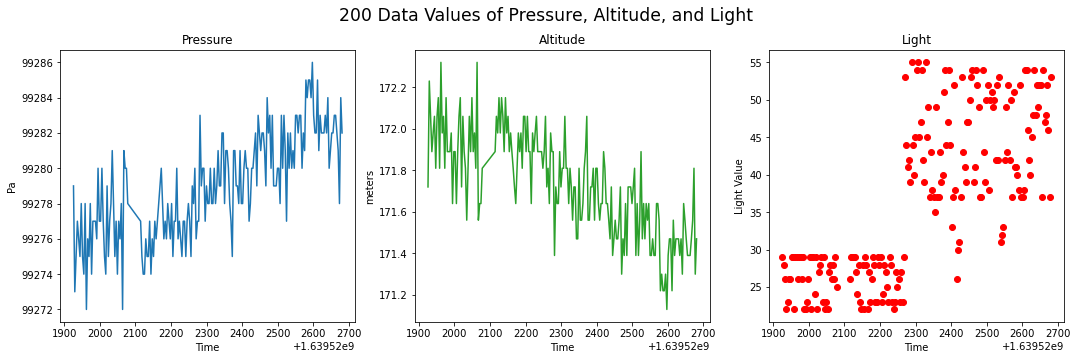

In [37]:
%matplotlib inline

#Visualizing Pressure, Altitude, and Light
fig = plt.figure(figsize = (18,5))
fig.suptitle('Visualization of 200 Data Values of Pressure, Altitude, and Light', y = 1, size = 'xx-large')

plt.subplot(131)
plt.title('Pressure')
plt.plot(times,pressures, 'tab:blue')
plt.ylabel("Pa")
plt.xlabel("Time")

plt.subplot(132)
plt.title('Altitude')
plt.plot(times,altitudes, 'tab:green')
plt.ylabel("meters")
plt.xlabel("Time")

plt.subplot(133)
plt.title('Light')
plt.scatter(times,lights,c = 'red')
plt.ylabel("Light Value")
_=plt.xlabel("Time")

Pressure and altitude had very low variability as I was in a controlled indoor environment. The light values shows two main clusters that are vastly different in value as I turned on a light that was near the sensor halfway through the data collection.

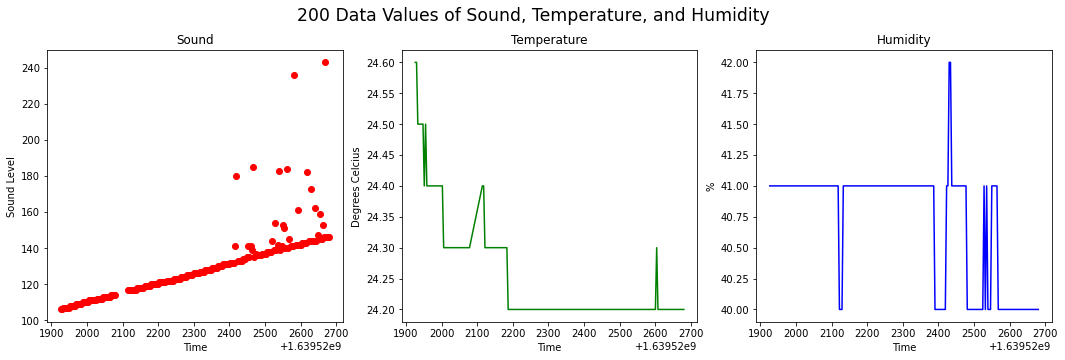

In [43]:
#Visualizing Sound, Temperature, and Humidity
fig = plt.figure(figsize = (18,5))
fig.suptitle('Visualization of 200 Data Values of Sound, Temperature, and Humidity', y = 1, size = 'xx-large')

plt.subplot(131)
plt.title('Sound')
plt.scatter(times,sounds, c = 'red')
plt.ylabel("Sound Level")
plt.xlabel("Time")

plt.subplot(132)
plt.title('Temperature')
plt.plot(times,temps, c = 'green')
plt.ylabel("Degrees Celcius")
plt.xlabel("Time")

plt.subplot(133)
plt.title('Humidity')
plt.plot(times,hums, c = 'blue')
plt.ylabel("%")
_=plt.xlabel("Time")

Because I was recording the data indoors, in a controlled environment, the range of humidity and temperature is very small as there was not much change in those factors during the time of data collection. Sound level had some variabilty as I was talking during the last half of data collection, however before that it stayed relatively stable.